In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
import statistics
from sklearn.preprocessing import StandardScaler

In [2]:
dataorig=pd.read_csv("futbol.csv")#Leemos el fichero csv
dataorig

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,18202,238813,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47,65,Crewe Alexandra,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K
18203,18203,243165,N. Christoffersson,19,https://cdn.sofifa.org/players/4/19/243165.png,Sweden,https://cdn.sofifa.org/flags/46.png,47,63,Trelleborgs FF,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,€113K
18204,18204,241638,B. Worman,16,https://cdn.sofifa.org/players/4/19/241638.png,England,https://cdn.sofifa.org/flags/14.png,47,67,Cambridge United,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,€165K
18205,18205,246268,D. Walker-Rice,17,https://cdn.sofifa.org/players/4/19/246268.png,England,https://cdn.sofifa.org/flags/14.png,47,66,Tranmere Rovers,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,€143K


In [3]:
dataorig.columns#Mostramos todas las variables

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [4]:
dataframe = pd.DataFrame(columns=['Columna','length'])
for col in dataorig.columns:
    length=len(dataorig[col].value_counts())
    dataframe = dataframe.append({'Columna': col, 
                                    'length' :length}, ignore_index=True)
    

In [5]:
dataframe.sort_values(by='length', ascending=True).head(10)

,Columna,length
14,Preferred Foot,2
20,Real Face,2
16,Weak Foot,5
15,International Reputation,5
17,Skill Moves,5
18,Work Rate,9
19,Body Type,10
26,Height,21
21,Position,27
3,Age,29


Dado que en el caso de escoger todos los datos el ordenador se calentaba y se apagaba, he optado por escoger las columnas con menos valores distintos para asi poder escoger mas columnas para el modelo y que no sea tan pobre.

# 1. Realiza todo el preprocesamiento que sea necesario para adaptar las variables que no sean unívocas del Dataset y poder usar el algoritmo adecuado.

Clasificaremos el dataset segun las variables 'Overall','Preferred Foot','Real Face','International Reputation','Skill Moves'.
Dado que se nos piden grupos utilizaremos el algoritmo de kmeans.

In [6]:
data=dataorig[['Overall','Preferred Foot','Real Face','International Reputation','Skill Moves']]#Escogemos las columnas con las que vamos a hacer clustering

In [7]:
data

,Overall,Preferred Foot,Real Face,International Reputation,Skill Moves
0,94,Left,Yes,5.0,4.0
1,94,Right,Yes,5.0,5.0
2,92,Right,Yes,5.0,5.0
3,91,Right,Yes,4.0,1.0
4,91,Right,Yes,4.0,4.0
...,...,...,...,...,...
18202,47,Right,No,1.0,2.0
18203,47,Right,No,1.0,2.0
18204,47,Right,No,1.0,2.0
18205,47,Right,No,1.0,2.0


In [8]:
#se guardan las columnas para facilitar su uso mas tarde
nombrecolumnas=['Overall','Preferred Foot','Real Face','International Reputation','Skill Moves']

In [9]:
#Cambiamos de variables categoricas a variables numericas
for var in nombrecolumnas:
    data[var]=data[var].astype('category')
    data[var]=data[var].cat.codes


<ipython-input-9-fd1813628d7a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[var]=data[var].astype('category')
<ipython-input-9-fd1813628d7a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[var]=data[var].cat.codes


In [10]:
data.isnull().sum()#MIssing values

Overall                     0
Preferred Foot              0
Real Face                   0
International Reputation    0
Skill Moves                 0
dtype: int64

In [11]:
data=data.dropna()#Eliminamos los na

In [12]:
#Escogemos la cantidad de datos dado que tras intentar realizar el ejercicio con todos los datos mi 
# ordenandor se calentaba y tras estar unas horas intentando sacar el modelo se apagaba.
data=data.head(500)

In [13]:
#Quitamos la columna de target
y=data[['Overall']]
data=data.drop('Overall',axis=1)

In [14]:
# Estandarizamos los datos pero no el target
scaler = StandardScaler()
modelo = scaler.fit_transform(data)
#Creamos dataframe con los datos estandarizados para facilitar su uso
data=pd.DataFrame(modelo,columns = data.columns)

In [15]:
data

,Preferred Foot,Real Face,International Reputation,Skill Moves
0,-1.678331,0.635999,2.854166,0.861680
1,0.595830,0.635999,2.854166,1.768712
2,0.595830,0.635999,2.854166,1.768712
3,0.595830,0.635999,1.711585,-1.859415
4,0.595830,0.635999,1.711585,0.861680
...,...,...,...,...
495,0.595830,-1.572330,-0.573575,-1.859415
496,0.595830,-1.572330,-0.573575,0.861680
497,-1.678331,0.635999,-0.573575,-0.045352
498,-1.678331,0.635999,0.569005,0.861680


# 2. Utiliza varias configuraciones teniendo en cuenta el número de grupos que se creará y cambiando cómo se mide la distancia entre individuos. Crea una tabla donde se incluya toda la información y el número necesario de iteraciones para llegar a dicha solución. Se considera la mejor solución aquella que necesite menos iteraciones.

In [16]:
#Creamos array donde se guardan los datos 
array = []
#Probamos con distintos numeros de clusters para averiguar cual es el mejor
#Esto se hace mediante la variable inertia, cuanto menor sea este valor mejor será.
for i in range(1,10):
    kmeans = KMeans(n_clusters=i,random_state=0)
    #Entrenamos el modelo con todas las columnas y con la columna del target
    kmeans.fit(data)
    #El score corresponde con el valor opuesto del objetivo de kmeans
    precision=kmeans.inertia_
    #Guardamos los datos en el array
    array.append(precision)


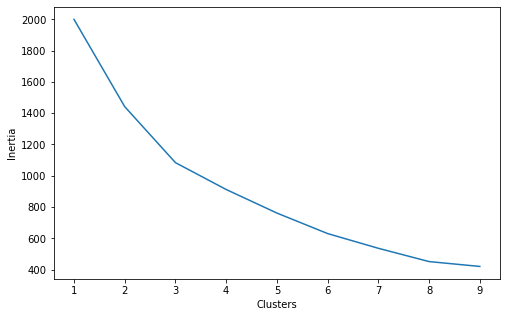

In [17]:
#plot
#Plot del score de las columnas
plt.figure(figsize=(8,5))
#Plot del numero de clusters frente a la inertia que corresponde con este numero
plt.plot(range(1,10),array)
#se representan todos los valores desde el 1 al 10
plt.xticks(range(1,10))
plt.xlabel('Clusters')
plt.ylabel('Inertia')
plt.show()


Considero segun la grafica que el mejor numero se encuentra entre el 2 y el 5, ya que a partir del numero dos la pendiente se reduce drasticamente y a partir del 5 la recta apenas tiene pendiente.

In [18]:
#Muestro la razon por la que se pone rango de 2 a 6, dado que de esta forma el numero llega hasta 5
rango=range(2,6)
for i in rango:
    print(i)

2
3
4
5


Tras escoger el rango en el que miramos los clusters calculamos lo que se nos pide.
En este caso para calcular la distancia utilizaremos la distancia entre los clusters dado que kmeans tiene una funcion que devuelve la posicion de los clusters y como hay 5 clusters y necesitamos solo una distancia, se calculara la media entre estas.
Realizamos kmeans para todas las columnas para asi poder estandarizar los datos y poder hacer una comparacion.

In [19]:
#Guardamos toda la informacion de un dataframe
dataframeinicial = pd.DataFrame(columns=['Variable','Cluster','distanciamedia','Inertia','Iteraciones'])
for colum in data.columns:
    for i in range(2,6):
        kmeans = KMeans(n_clusters=i,random_state=0)
        #Entrenamos el modelo con todas las columnas y con la columna del target
        kmeans.fit(data)

        #El score corresponde con el valor opuesto del objetivo de kmeans, es decir, inertia
        precision=kmeans.inertia_
        #iteraciones que ha necesitado el algoritmo 
        iteraciones=kmeans.n_iter_
        
        #devuelve la posicion de los centroides
        centroides=kmeans.cluster_centers_
        #Creamos un array en el que se guardaran las distancias entre los centroides
        distanciaarr = []
        #Comparacion de un centroide con todos los centroides y se guarda en un array
        for centroide0 in centroides:
            for centroide1 in centroides:
                #distancia euclidea de un centroide a todos los demas
                dist = np.linalg.norm(centroide0 - centroide1)
                #se guardan los datos en un array
                distanciaarr.append(dist)
        #calculamos la media de las distancias de los centroides para que solo este representado por un numero
        distmedia = statistics.mean(distanciaarr)
    
        dataframeinicial = dataframeinicial.append({'Variable': colum, 'Cluster' : i,'distanciamedia': distmedia, 'Inertia': precision,'Iteraciones':iteraciones}, ignore_index=True)

In [20]:
dataframeinicial

,Variable,Cluster,distanciamedia,Inertia,Iteraciones
0,Preferred Foot,2,1.166693,1441.766875,3
1,Preferred Foot,3,1.674206,1083.800075,3
2,Preferred Foot,4,1.792550,912.129983,2
3,Preferred Foot,5,2.111697,761.448786,4
4,Real Face,2,1.166693,1441.766875,3
5,Real Face,3,1.674206,1083.800075,3
6,Real Face,4,1.792550,912.129983,2
7,Real Face,5,2.111697,761.448786,4
8,International Reputation,2,1.166693,1441.766875,3
9,International Reputation,3,1.674206,1083.800075,3


In [21]:
dataframeinicial.sort_values(by =['Iteraciones','Cluster'],ascending=True,ignore_index=True)

,Variable,Cluster,distanciamedia,Inertia,Iteraciones
0,Preferred Foot,4,1.792550,912.129983,2
1,Real Face,4,1.792550,912.129983,2
2,International Reputation,4,1.792550,912.129983,2
3,Skill Moves,4,1.792550,912.129983,2
4,Preferred Foot,2,1.166693,1441.766875,3
5,Real Face,2,1.166693,1441.766875,3
6,International Reputation,2,1.166693,1441.766875,3
7,Skill Moves,2,1.166693,1441.766875,3
8,Preferred Foot,3,1.674206,1083.800075,3
9,Real Face,3,1.674206,1083.800075,3


In [22]:
dataframeinicial.groupby(['Cluster'])['Iteraciones'].sum()

Cluster
2    12
3    12
4     8
5    16
Name: Iteraciones, dtype: int64

Podemos ver según la representación anterior que el cluster 4 tiene el menor numero de iteraciones, ademas si tenemos en cuenta el resto de variables podemos ver que se encuentra en un punto medio entre el valor máximo y el valor mínimo de estas variables.

# 3. Con la mejor configuración del punto anterior. Utiliza dos criterios para elegir el lugar inicial del punto central de los grupos. Dibuja cómo se van modificando los grupos y cómo van cambiando sus centroides en cada iteración. Obtén una conclusión acerca de donde deberían situarse los centroides.

Podemos ver que la mejor configuracion se consigue con 4 clusters y los dos criterios que vamos a utilizar para generar los clusters son ‘k-means++’: ubica los centroides en una posicion especifica para acelerar la convergencia, ‘random’: ubica los centroides en una posicion aleatoria.

In [23]:

data

,Preferred Foot,Real Face,International Reputation,Skill Moves
0,-1.678331,0.635999,2.854166,0.861680
1,0.595830,0.635999,2.854166,1.768712
2,0.595830,0.635999,2.854166,1.768712
3,0.595830,0.635999,1.711585,-1.859415
4,0.595830,0.635999,1.711585,0.861680
...,...,...,...,...
495,0.595830,-1.572330,-0.573575,-1.859415
496,0.595830,-1.572330,-0.573575,0.861680
497,-1.678331,0.635999,-0.573575,-0.045352
498,-1.678331,0.635999,0.569005,0.861680


Como podemos ver en la tabla del ejercicio anterior el numero de iteraciones que requieren kmeans para terminar es como maximo 4, por lo tanto, se mirara las iteraciones del 1 al 10.
Para mirar como se ajusta kmeans segun el numero de iteraciones haremos uso del parametro max_iter.

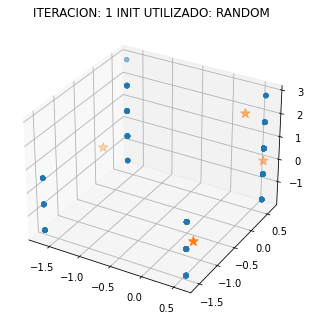

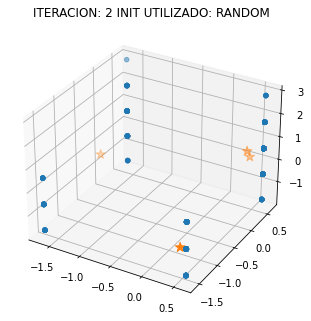

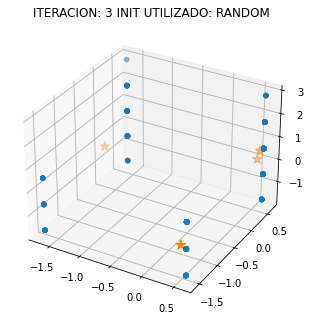

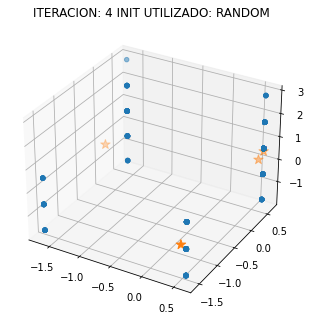

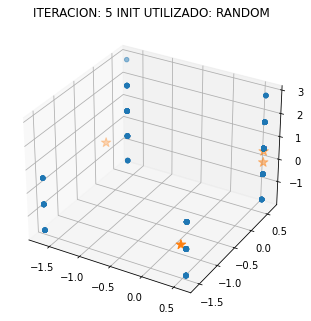

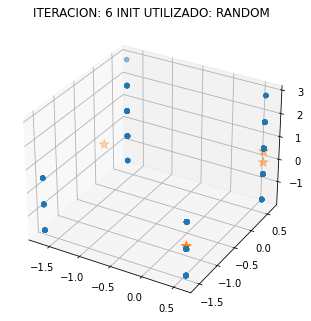

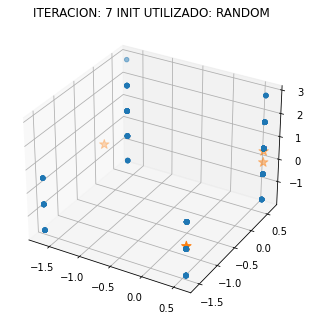

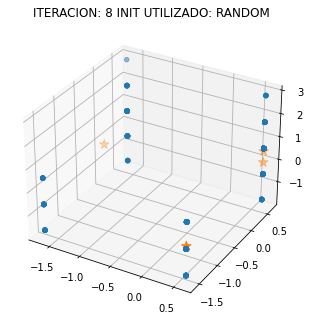

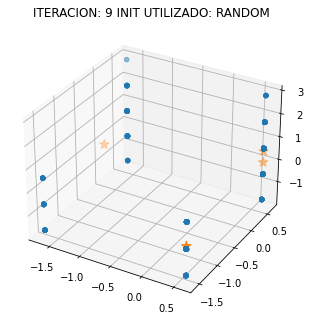

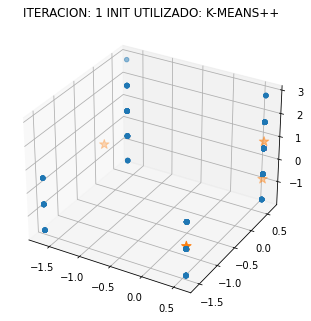

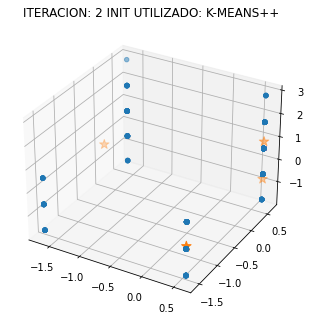

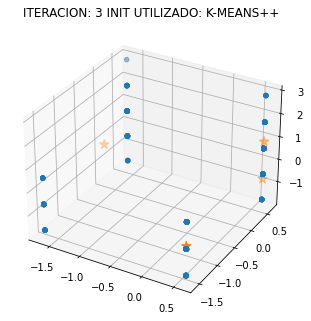

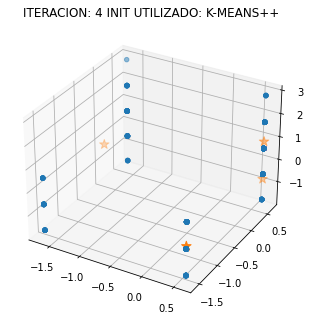

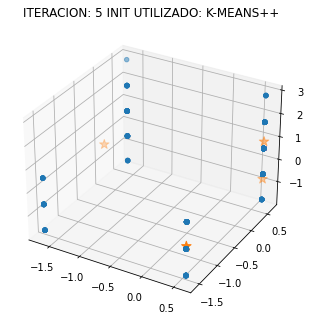

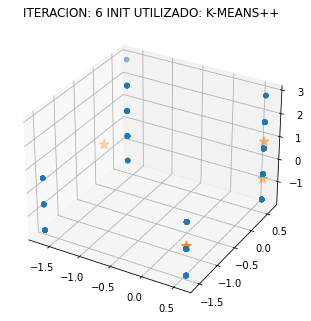

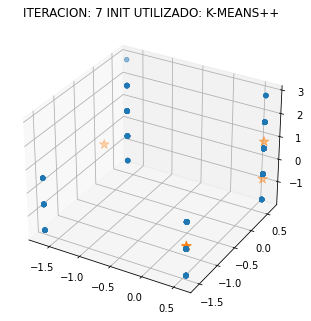

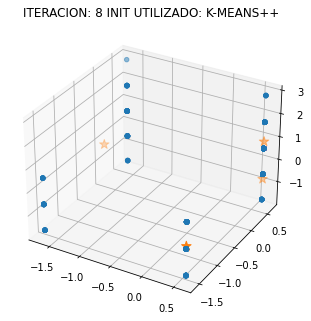

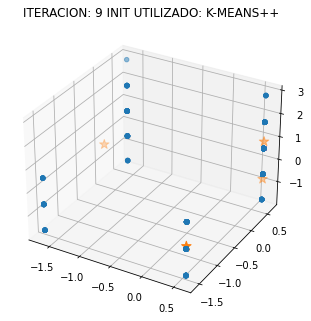

In [24]:
dataframerandom = pd.DataFrame(columns=['Init','distanciamedia','Inertia','Iteraciones'])
#En este caso se hara un plot de cada clase juntas
init=['random','k-means++']
#for que repite el bucle con las dos inicializaciones
for var in range(0,len(init)):
    #for que controla las iteraciones de kmeans
    for i in range(1,10):
        kmeans = KMeans(n_clusters=4,max_iter=i,init=init[var],random_state=0)
        #Entrenamos el modelo con todas las columnas y con la columna del target
        kmeans.fit(data)

        #El score corresponde con el valor opuesto del objetivo de kmeans, es decir, inertia
        precision=kmeans.inertia_
        #numero de iteraciones necesitados para que kmeans converga
        iteraciones=kmeans.n_iter_

        #Devuelve la posicion de los centroides
        centroides=kmeans.cluster_centers_
        #Creamos un array en el que se guardaran las distancias entre los centroides
        distanciaarr = []
        #Comparacion de un centroide con todos los centroides
        for centroide0 in centroides:
            for centroide1 in centroides:
                #distancia euclidea de un centroide a todos los demas
                dist = np.linalg.norm(centroide0 - centroide1)
                #se guarda el resultado en el array
                distanciaarr.append(dist)
        #calculamos la media de las distancias de los centroides para que solo este representado por un numero
        distmedia = statistics.mean(distanciaarr)

        #PLOT
        titulo='Iteracion: '+str(i)+ ' init utilizado: '+ str(init[var])
        fig = plt.figure()
        ax = Axes3D(fig)
        #pintamos los valores de 3 columnas dadod que es un modelo 3D
        ax.scatter(data.iloc[:, 0] ,data.iloc[:, 1], data.iloc[:, 2])
        #En este casso no se necesita iloc dado que sklearn te los da como np.array
        ax.scatter(centroides[:, 0], centroides[:, 1], centroides[:, 2] , marker='*', s=100)
        plt.title(titulo.upper())
        dataframerandom = dataframerandom.append({'Init':init[var],'distanciamedia': distmedia, 'Inertia': precision,'Iteraciones':iteraciones}, ignore_index=True)

Como las distancias medias no varian mucho, no considero que sea un factor determinante como podria ser el numero de iteraciones o la inertia, por lo tanto, se ordenara el dataframe con dichas columnas.

In [25]:
#Ordenamos el dataframe segun los valores del numero de iteraciones y de la inertia
dataframerandom.sort_values(by =['Iteraciones', 'Inertia'],ascending=True, ignore_index=True)

,Init,distanciamedia,Inertia,Iteraciones
0,k-means++,1.792550,912.129983,1
1,random,1.894232,969.464291,1
2,k-means++,1.792550,912.129983,2
3,k-means++,1.792550,912.129983,2
4,k-means++,1.792550,912.129983,2
5,k-means++,1.792550,912.129983,2
6,k-means++,1.792550,912.129983,2
7,k-means++,1.792550,912.129983,2
8,k-means++,1.792550,912.129983,2
9,k-means++,1.792550,912.129983,2


En este dataframe podemos ver que el mejor resultado se obtiene con una inicilizacion kmeans++ que se corresponde con la primera fila, aunque la inicializacion random le sigue de cerca.
Pero viendo el dataframe podemos ver que en la parte superior hay mas inicializaciones con kmeans++ (aunque por poco) por ello podemos afirmar que este tipo de inicializacion es mejor para situar los clusters.
El dataframe esta ordenador segun el numero de iteraciones y el valor de inerta en orden ascendente.

# 4. Estudia que técnicas de postprocesamiento se podrían aplicar en base al error cometido en cada clúster

Dividiremos los valores de las columnas en 4.
Cuando se pide el error cometido en cada cluster entiendo que se refiere a kmeans variando el numero de clusters.

In [26]:
#Categorizamos la variables segun los cuartiles.
for var in data.columns:
    descr=data[var].describe()
    conditionlist = [
        (data[var] >= descr['min']) & (data[var] <=descr['25%']),
        (data[var] > descr['25%']) & (data[var] <=descr['50%']),
        (data[var] > descr['50%']) & (data[var] <=descr['75%']),
        (data[var] > descr['75%'])]
    choicelist = [0,0.25,0.50,0.75]
    data[var] = np.select(conditionlist, choicelist, default='Not Specified')
data

,Preferred Foot,Real Face,International Reputation,Skill Moves
0,0,0.25,0.75,0.5
1,0.25,0.25,0.75,0.75
2,0.25,0.25,0.75,0.75
3,0.25,0.25,0.75,0
4,0.25,0.25,0.75,0.5
...,...,...,...,...
495,0.25,0,0,0
496,0.25,0,0,0.5
497,0,0.25,0,0.25
498,0,0.25,0.25,0.5


In [27]:
#Guardamos toda la informacion de un dataframe
dataframe = pd.DataFrame(columns=['Variable','Cluster','distanciamedia','Inertia','Iteraciones'])
for colum in data.columns:
    for i in range(2,6):
        kmeans = KMeans(n_clusters=i,random_state=0)
        #Entrenamos el modelo con todas las columnas y con la columna del target
        kmeans.fit(data)

        #El score corresponde con el valor opuesto del objetivo de kmeans, es decir, inertia
        precision=kmeans.inertia_
        #numero de iteraciones que require para ceonverger kmeans
        iteraciones=kmeans.n_iter_
        
        #devuelve las posiciones de los centroides
        centroides=kmeans.cluster_centers_
        #Creamos un array en el que se guardaran las distancias entre los centroides
        distanciaarr = []
        #Comparacion de un centroide con todos los centroides y se guarda en un array
        for centroide0 in centroides:
            for centroide1 in centroides:
                #distancia euclidea de un centroide con todos los demas
                dist = np.linalg.norm(centroide0 - centroide1)
                #guardamos los resultados en el array
                distanciaarr.append(dist)
        #calculamos la media de las distancias de los centroides para que solo este representado por un numero
        distmedia = statistics.mean(distanciaarr)
        #guardamos los datos en el dataframe
        dataframe = dataframe.append({'Variable': colum, 'Cluster' : i,'distanciamedia': distmedia, 'Inertia': precision,'Iteraciones':iteraciones}, ignore_index=True)

In [28]:
dataframe['Dataframe']='Postprocesa'
#se añaden columnas que indican a que dataframe corresponden para favorecer la comprension

In [29]:
dataframeinicial['Dataframe']='Inicial'

In [30]:
print('Inertia e iteraciones')
pd.concat([dataframeinicial, dataframe]).sort_values(by =['Iteraciones', 'Inertia'],ascending=True, ignore_index=True)

Inertia e iteraciones


,Variable,Cluster,distanciamedia,Inertia,Iteraciones,Dataframe
0,Preferred Foot,4,1.792550,912.129983,2,Inicial
1,Real Face,4,1.792550,912.129983,2,Inicial
2,International Reputation,4,1.792550,912.129983,2,Inicial
3,Skill Moves,4,1.792550,912.129983,2,Inicial
4,Preferred Foot,3,1.674206,1083.800075,3,Inicial
5,Real Face,3,1.674206,1083.800075,3,Inicial
6,International Reputation,3,1.674206,1083.800075,3,Inicial
7,Skill Moves,3,1.674206,1083.800075,3,Inicial
8,Preferred Foot,2,1.166693,1441.766875,3,Inicial
9,Real Face,2,1.166693,1441.766875,3,Inicial


In [31]:
print('Inertia')
pd.concat([dataframeinicial, dataframe]).sort_values(by =['Inertia'],ascending=True, ignore_index=True)

Inertia


,Variable,Cluster,distanciamedia,Inertia,Iteraciones,Dataframe
0,Skill Moves,5,0.383965,21.107369,5,Postprocesa
1,International Reputation,5,0.383965,21.107369,5,Postprocesa
2,Real Face,5,0.383965,21.107369,5,Postprocesa
3,Preferred Foot,5,0.383965,21.107369,5,Postprocesa
4,International Reputation,4,0.389892,23.268028,5,Postprocesa
5,Real Face,4,0.389892,23.268028,5,Postprocesa
6,Preferred Foot,4,0.389892,23.268028,5,Postprocesa
7,Skill Moves,4,0.389892,23.268028,5,Postprocesa
8,Skill Moves,3,0.390073,27.600706,4,Postprocesa
9,International Reputation,3,0.390073,27.600706,4,Postprocesa


De la misma forma que en los dataframes anteriores podemos apreciar que la distancia media es muy proxima, por lo tanto, se ordenara el dataframe segun la inertia y la iteraciones.

* Si tenemos en cuenta la variable inertia sobre el numero de iteraciones podemos ver que se obtiene mucho menos inertia con la tecnica de postprocesamiento, que es algo bueno pero tambien podemos ver que se obtiene este bajo numero aumentando el numero de iteraciones.
* Si tenemos en cuenta el numero de iteraciones sobre el valor de inerta se puede apreciar que sin la tecnica de postprocesamiento el valor de las iteraciones es mas bajo.
* Teniendo en cuenta las 3 variables, tanto la distancia media que debe ser alta, la inertia que debe ser baja y el numero de iteraciones que debe ser bajo en conjunto podemos ver que se obtienen mejores resultados sin la tecnica de postprocesamiento.

# Referencias
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
https://docs.python.org/3/library/statistics.html
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html
https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html